In [33]:
!pip install matplotlib numpy
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import json
from pathlib import Path

base_dir = Path('../out')
softmax0_dir = Path('softmax0-15m-2023_08_22_14_44_50')
softmax1_dir = Path('softmax1-15m-2023_08_22_03_16_17')

# Load the JSON files
with open(base_dir / softmax0_dir / 'weights.json', "r") as f:
    softmax0_data = json.load(f)
    
with open(base_dir / softmax1_dir / 'weights.json', "r") as f:
    softmax1_data = json.load(f)

# Let's print out the top-level keys and structure to understand the data better
softmax0_data_keys = list(softmax0_data.keys())
softmax1_data_keys = list(softmax1_data.keys())

softmax0_data_keys, softmax1_data_keys

(['tok_embeddings.weight',
  'layers.0.attention.wq.weight',
  'layers.0.attention.wk.weight',
  'layers.0.attention.wv.weight',
  'layers.0.attention.wo.weight',
  'layers.0.feed_forward.w1.weight',
  'layers.0.feed_forward.w2.weight',
  'layers.0.feed_forward.w3.weight',
  'layers.0.attention_norm.weight',
  'layers.0.ffn_norm.weight',
  'layers.1.attention.wq.weight',
  'layers.1.attention.wk.weight',
  'layers.1.attention.wv.weight',
  'layers.1.attention.wo.weight',
  'layers.1.feed_forward.w1.weight',
  'layers.1.feed_forward.w2.weight',
  'layers.1.feed_forward.w3.weight',
  'layers.1.attention_norm.weight',
  'layers.1.ffn_norm.weight',
  'layers.2.attention.wq.weight',
  'layers.2.attention.wk.weight',
  'layers.2.attention.wv.weight',
  'layers.2.attention.wo.weight',
  'layers.2.feed_forward.w1.weight',
  'layers.2.feed_forward.w2.weight',
  'layers.2.feed_forward.w3.weight',
  'layers.2.attention_norm.weight',
  'layers.2.ffn_norm.weight',
  'layers.3.attention.wq.weight',


In [35]:
# Exploring the structure of data inside one of the keys
sample_key = softmax0_data_keys[0]
softmax0_sample_data = softmax0_data[sample_key]
softmax1_sample_data = softmax1_data[sample_key]

softmax0_sample_data, softmax1_sample_data

({'mean': -0.0016343051102012396,
  'var': 0.0038931926246732473,
  'std': 0.062395453453063965,
  'skews': -2.7351033687591553,
  'kurtosis': 29.507484436035156,
  'outliers': 23467,
  'outlier_percent': 0.002546332465277778},
 {'mean': -0.0030575105920434,
  'var': 0.008043774403631687,
  'std': 0.08968709409236908,
  'skews': -0.8338078260421753,
  'kurtosis': 18.851457595825195,
  'outliers': 44748,
  'outlier_percent': 0.00485546875})

In [36]:
# Extracting the kurtosis and skew values for each layer

softmax0_skews = [softmax0_data[key]['skews'] for key in softmax0_data_keys]
softmax0_kurtosis = [softmax0_data[key]['kurtosis'] for key in softmax0_data_keys]

softmax1_skews = [softmax1_data[key]['skews'] for key in softmax1_data_keys]
softmax1_kurtosis = [softmax1_data[key]['kurtosis'] for key in softmax1_data_keys]

# Checking the extracted data for the first few layers
softmax0_skews[:5], softmax0_kurtosis[:5], softmax1_skews[:5], softmax1_kurtosis[:5]

([-2.7351033687591553,
  -0.0028434402775019407,
  0.021585451439023018,
  -0.013842478394508362,
  0.10141679644584656],
 [29.507484436035156,
  1.6188158988952637,
  1.1567010879516602,
  0.297649621963501,
  11.977744102478027],
 [-0.8338078260421753,
  0.010199151001870632,
  0.04288599640130997,
  -0.006655456963926554,
  -0.009102443233132362],
 [18.851457595825195,
  1.0952239036560059,
  1.2222018241882324,
  0.36399269104003906,
  13.020711898803711])

In [37]:
!mkdir -p ../out/images

mkdir: ../out/images: File exists
mkdir: -p: File exists


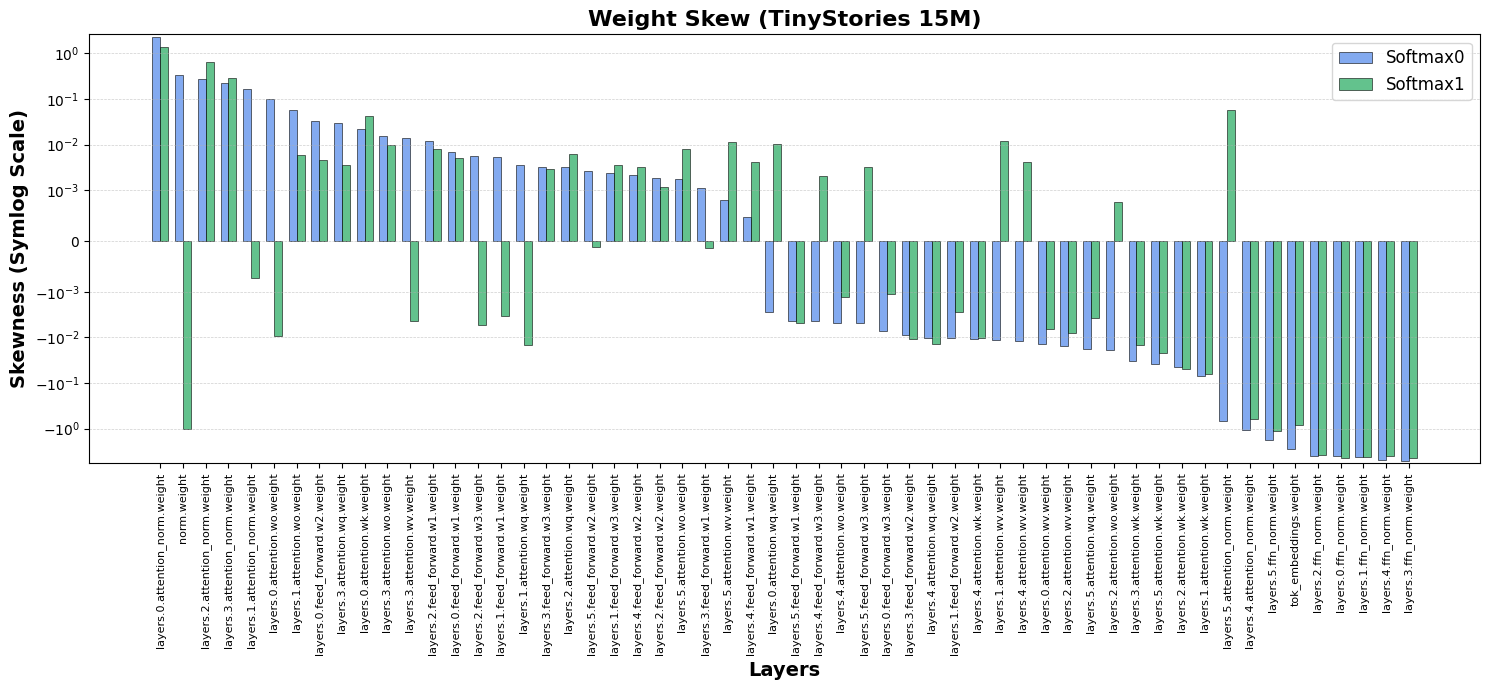

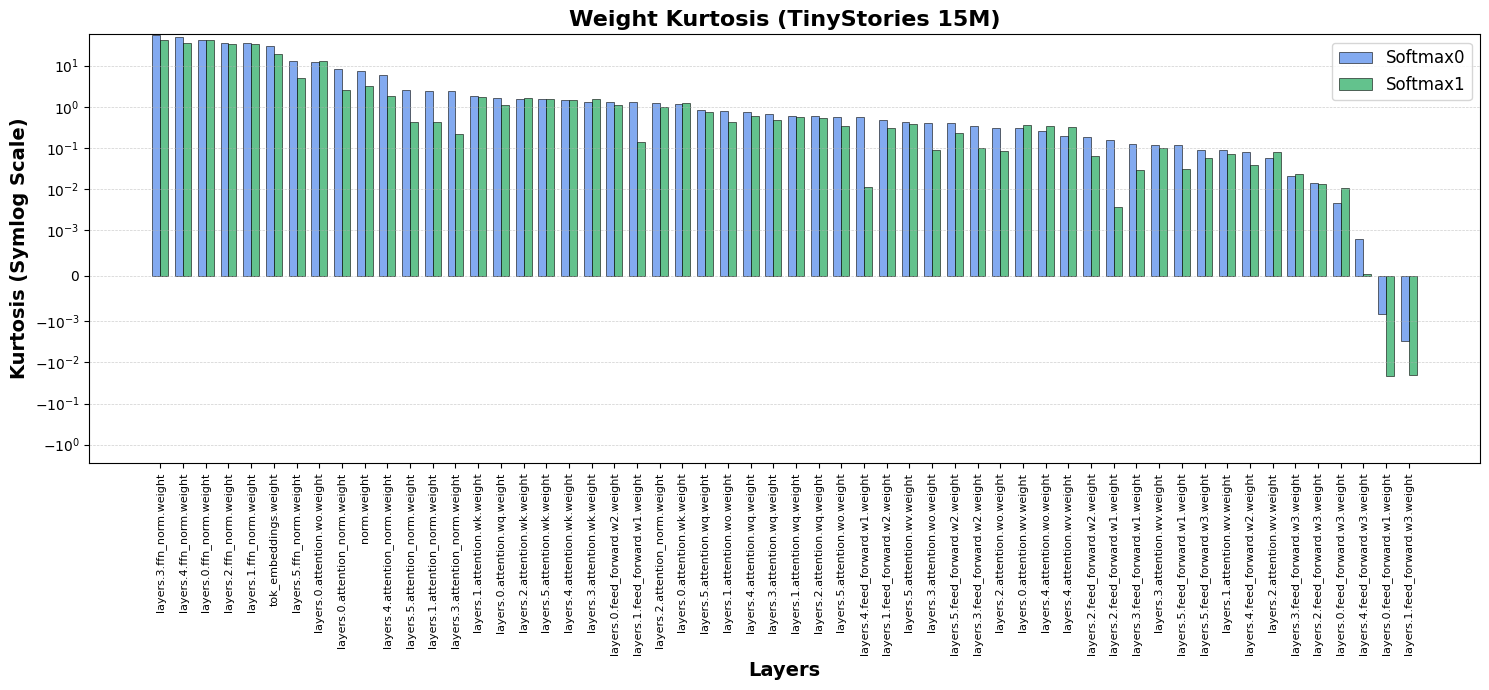

In [43]:
def plot_weight_bar_charts(values_softmax0, values_softmax1, labels, title, y_label, linthresh=0.001):
    # Sort values by softmax0's values in descending order
    sorted_indices = np.argsort(values_softmax0)[::-1]
    values_softmax0_sorted = np.array(values_softmax0)[sorted_indices]
    values_softmax1_sorted = np.array(values_softmax1)[sorted_indices]
    labels_sorted = np.array(labels)[sorted_indices]
    
    # Set the width of the bars and other plotting parameters
    bar_width = 0.35
    index = np.arange(len(labels_sorted))
    
    plt.figure(figsize=(15,7))
    
    # Create bars with a border for clear distinction
    plt.bar(index, values_softmax0_sorted, bar_width, label='Softmax0', alpha=0.8, color='cornflowerblue', edgecolor='black', linewidth=0.5)
    plt.bar(index + bar_width, values_softmax1_sorted, bar_width, label='Softmax1', alpha=0.8, color='mediumseagreen', edgecolor='black', linewidth=0.5)
    
    # Title & subtitle with increased font size
    plt.title(title, fontweight='bold', fontsize=16)
    plt.xlabel('Layers', fontweight='bold', fontsize=14)
    plt.ylabel(y_label, fontweight='bold', fontsize=14)
    
    # X axis with reduced font size for labels
    plt.xticks(index + bar_width/2, labels_sorted, rotation=90, fontsize=8)
    
    # Symlog scale for y-axis
    plt.yscale('symlog', linthresh=linthresh)
    
    # Displaying a grid
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
    
    # Adding a legend with larger font size
    plt.legend(fontsize=12)
    
    # Adjust layout for better visualization
    plt.tight_layout()

# Plotting the skewness values with the symlog scale
plot_weight_bar_charts(softmax0_skews, softmax1_skews, softmax0_data_keys, 'Weight Skew (TinyStories 15M)', 'Skewness (Symlog Scale)')
plt.savefig(base_dir / 'images' / '15m-weight-skew.png')
plt.show()

# Plotting the kurtosis values with the symlog scale
plot_weight_bar_charts(softmax0_kurtosis, softmax1_kurtosis, softmax0_data_keys, 'Weight Kurtosis (TinyStories 15M)', 'Kurtosis (Symlog Scale)')
plt.savefig(base_dir / 'images' / '15m-weight-kurtosis.png')
plt.show()

In [41]:
# Calculate the average skewness and kurtosis values over softmax0 and softmax1
avg_skew_softmax0 = np.mean(softmax0_skews)
avg_kurtosis_softmax0 = np.mean(softmax0_kurtosis)

avg_skew_softmax1 = np.mean(softmax1_skews)
avg_kurtosis_softmax1 = np.mean(softmax1_kurtosis)

avg_skew_softmax0, avg_kurtosis_softmax0, avg_skew_softmax1, avg_kurtosis_softmax1

# Data for plotting
categories = ['Skew (avg)', 'Kurtosis (avg)']
softmax0_values = [avg_skew_softmax0, avg_kurtosis_softmax0]
softmax1_values = [avg_skew_softmax1, avg_kurtosis_softmax1]

softmax0_values, softmax1_values

([-0.4514870490934949, 5.8032782801559994],
 [-0.3925294205700993, 4.455862160239901])

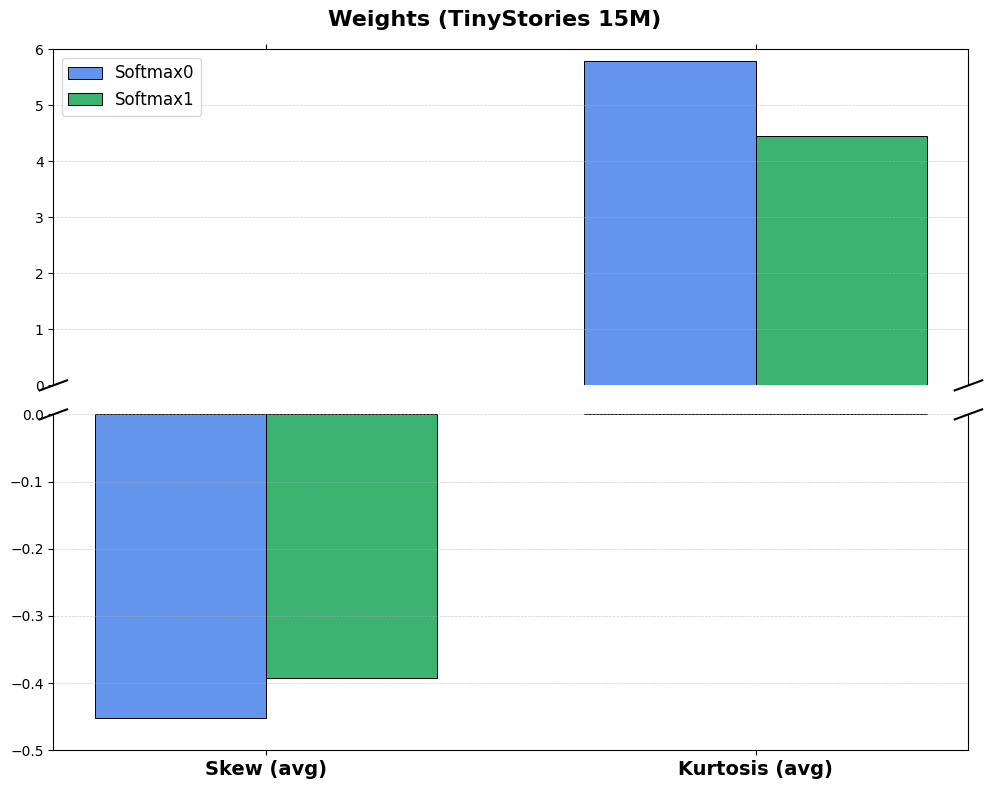

In [54]:
def plot_summary_chart(values_softmax0, values_softmax1, categories, title):
    # Set the width of the bars and other plotting parameters
    bar_width = 0.35
    index = np.arange(len(categories))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    # Plot the data on both axes
    ax1.bar(index, values_softmax0, bar_width, label='Softmax0', color='cornflowerblue', edgecolor='black', linewidth=0.7)
    ax1.bar(index + bar_width, values_softmax1, bar_width, label='Softmax1', color='mediumseagreen', edgecolor='black', linewidth=0.7)

    ax2.bar(index, values_softmax0, bar_width, color='cornflowerblue', edgecolor='black', linewidth=0.7)
    ax2.bar(index + bar_width, values_softmax1, bar_width, color='mediumseagreen', edgecolor='black', linewidth=0.7)

    # Set the limits of y axis
    ax1.set_ylim(0, 6)  # For kurtosis values
    ax2.set_ylim(-0.5, 0)  # For skew values

    # Hide the spines between ax1 and ax2
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)
    ax2.xaxis.tick_bottom()

    # Add broken axis lines
    d = 0.015
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    # Title & labels with increased font size
    fig.suptitle(title, fontweight='bold', fontsize=16, y=0.98)
    plt.xticks(index + bar_width/2, categories, fontsize=14, fontweight='bold')

    # Displaying a grid
    ax1.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
    ax2.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

    # Adding a legend with larger font size to the top plot
    ax1.legend(loc='upper left', fontsize=12)

    # Adjust layout for better visualization
    plt.tight_layout()

# Plot the broken axis bar chart using the encapsulated function
plot_summary_chart(softmax0_values, softmax1_values, categories, 'Weights (TinyStories 15M)')
plt.savefig(base_dir / 'images' / '15m-weight-summary.png')
plt.show()